## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Function to plot Decision Boundary

In [98]:
# Plot the decision boundary
def plot_decision_boundary(ax, X, y, classifier, title):
    h = .02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plot the error rate
def plot_error_rate(ax, error):
    ax.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
    ax.set_title('Error Rate K Value')
    ax.set_xlabel('K Value')
    ax.set_ylabel('Mean Error')
    ax.set_xticks(np.arange(1, 31))

## Implementation of KNN

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       104
           1       0.96      0.93      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



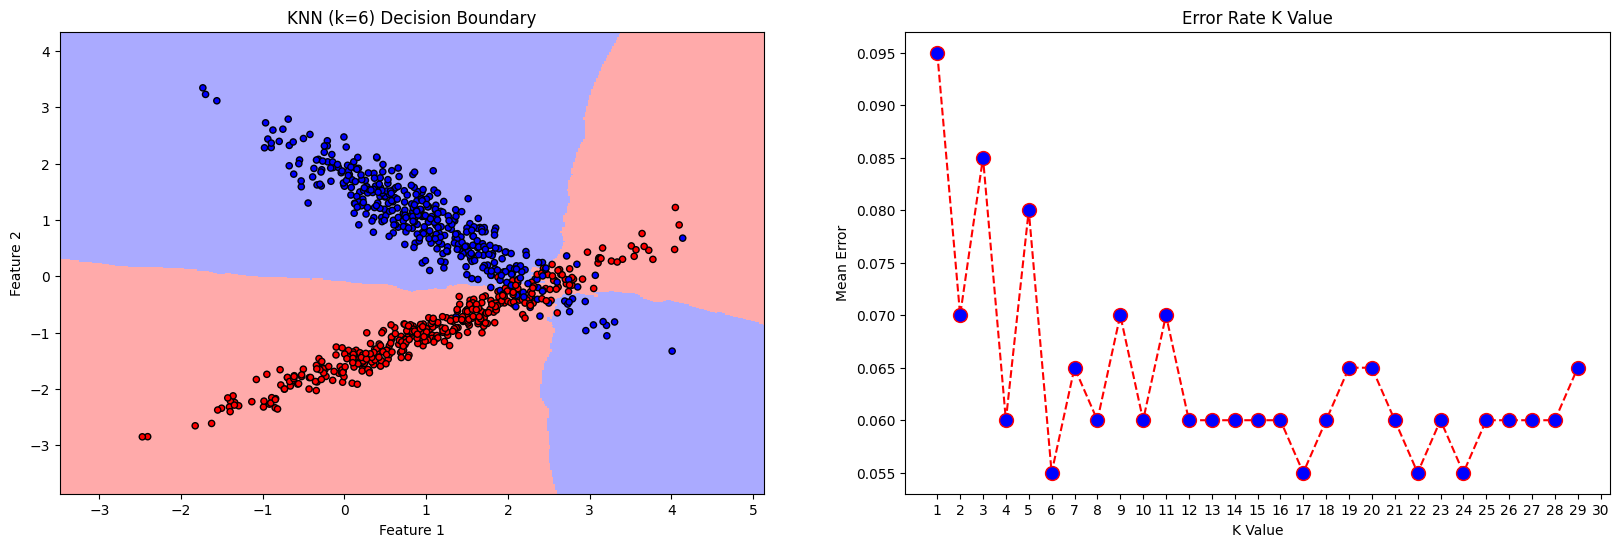

In [99]:
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=6)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plot the error rate
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig, ax = plt.subplots(1,2, figsize=(20, 6))


plot_decision_boundary(ax[0], X_train, y_train, knn_classifier, 'KNN (k=6) Decision Boundary')
plot_error_rate(ax[1], error)
plt.show()

